In [12]:
import yaml
import pandas as pd
import numpy as np
from backend.utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "5min"
training_file_path: str = f"../data/indicators ({interval})/AAPL_indicators.csv"
testing_file_path: str = f"../data/indicators ({interval})/AMZN_indicators.csv"

training_df = pd.read_csv(testing_file_path)
testing_df = pd.read_csv(testing_file_path)
training_preprocessor = DataPreprocessor(training_df)
testing_preprocessor = DataPreprocessor(testing_df)

scaler = StandardScaler()
X_train = training_preprocessor.target_data_batched
X_test = testing_preprocessor.target_data_batched
y_test = testing_preprocessor.target_data_batched_target

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
X_train_fitted_reshaped = scaler.fit(X_train_reshaped)

X_test_scaled_reshaped = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)
# y_test = np.ones_like(y_test)


In [13]:
print("Testing Dataset shape:", testing_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)
# %run ../tests/data_preprocessor_validator.py

Testing Dataset shape: (5000, 13)
Testing Dataset as time series batches: (4958, 30, 30) (4958,)


In [14]:
from sklearn.metrics import classification_report
from keras.models import load_model
from backend.utils.model_evaluator import ModelEvaluator

model_path: str = "../models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

classification_report_output = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report_output)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

155/155 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2300
           1       0.87      0.86      0.87      2658

    accuracy                           0.86      4958
   macro avg       0.86      0.86      0.86      4958
weighted avg       0.86      0.86      0.86      4958



,Metric,Score
0,Loss,0.403226
1,Accuracy,0.860024
2,Precision,0.872817
3,Recall,0.864936
4,F1Score,0.868859
5,ROC AUC,0.859642


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

,Actual,Predicted,Predicted_Prob
0,0,0,0.213487
1,0,0,0.196270
2,0,0,0.181844
3,0,0,0.173069
4,0,0,0.178855
5,0,0,0.165785
6,0,0,0.183078
7,1,0,0.280397
8,1,0,0.399140
9,1,1,0.505460


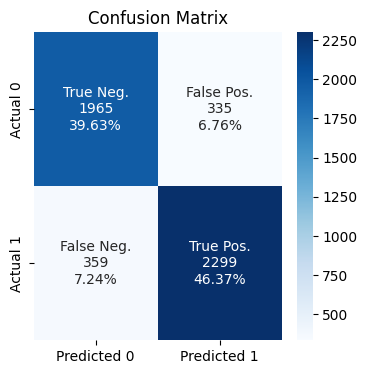

In [16]:
from backend.utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [17]:
from backend.utils.visualizing_service import plot_correlation_heatmap
# plot_correlation_heatmap(test_processor.target_data)
